In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from IPython.display import FileLink
from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.random.seed(0)

import random
import shutil
import cv2
import os

In [7]:
dataset_path = '/archive/dataset'

In [10]:
covid_dataset_path = '/ dataset/'

In [11]:
#construct the path to the metadata CSV file and load it
df = pd.read_csv('archive/metadata.csv')

In [8]:

    shutil.copy2(imagePath, outputPath)

'/home/kl2418/Documents/Hex_Cambridge'

In [12]:
def ceildiv(a, b):
    return -(-a // b)

def plots_from_files(imspaths, figsize=(10,5), rows=1, titles=None, maintitle=None):
    """Plot the images in a grid"""
    f = plt.figure(figsize=figsize)
    if maintitle is not None: plt.suptitle(maintitle, fontsize=10)
    for i in range(len(imspaths)):
        sp = f.add_subplot(rows, ceildiv(len(imspaths), rows), i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        img = plt.imread(imspaths[i])
        plt.imshow(img)

In [18]:
normal_images = list(paths.list_images('dataset/normal'))
covid_images = list(paths.list_images('dataset/covid'))

In [19]:
normal_images

['dataset/normal/IM-0375-0001.jpeg',
 'dataset/normal/NORMAL2-IM-0486-0001.jpeg',
 'dataset/normal/NORMAL2-IM-1322-0001.jpeg',
 'dataset/normal/IM-0262-0001.jpeg',
 'dataset/normal/NORMAL2-IM-0627-0001.jpeg',
 'dataset/normal/NORMAL2-IM-0808-0001.jpeg',
 'dataset/normal/IM-0199-0001.jpeg',
 'dataset/normal/IM-0664-0001.jpeg',
 'dataset/normal/NORMAL2-IM-0723-0001.jpeg',
 'dataset/normal/NORMAL2-IM-0599-0001.jpeg',
 'dataset/normal/IM-0478-0001.jpeg',
 'dataset/normal/NORMAL2-IM-1293-0001.jpeg',
 'dataset/normal/NORMAL2-IM-0956-0001.jpeg',
 'dataset/normal/IM-0541-0001.jpeg',
 'dataset/normal/IM-0351-0001.jpeg',
 'dataset/normal/IM-0702-0001.jpeg',
 'dataset/normal/IM-0619-0001.jpeg',
 'dataset/normal/IM-0668-0001.jpeg',
 'dataset/normal/IM-0737-0001.jpeg',
 'dataset/normal/NORMAL2-IM-1026-0001.jpeg',
 'dataset/normal/NORMAL2-IM-1006-0001.jpeg',
 'dataset/normal/IM-0703-0001.jpeg',
 'dataset/normal/IM-0656-0001-0001.jpeg',
 'dataset/normal/NORMAL2-IM-1117-0001.jpeg',
 'dataset/normal/IM

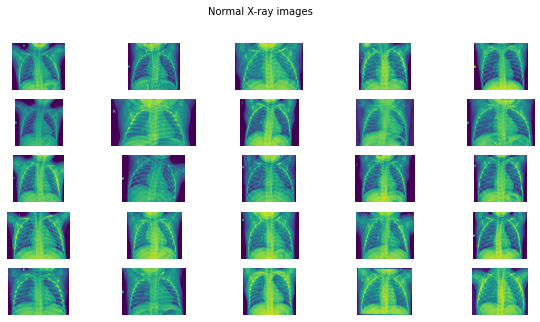

In [20]:
plots_from_files(normal_images, rows=5, maintitle="Normal X-ray images")

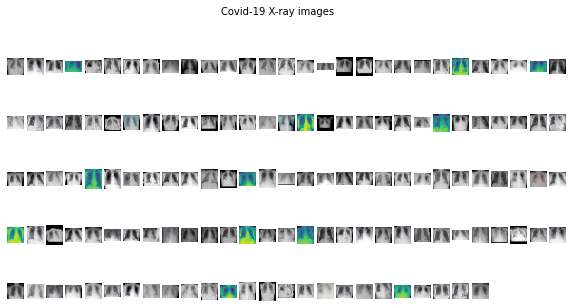

In [21]:
plots_from_files(covid_images, rows=5, maintitle="Covid-19 X-ray images")

In [25]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images

print("[INFO] loading images...")
imagePaths = list(paths.list_images('dataset/'))

[INFO] loading images...


In [26]:
data = []
labels = []

# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]
    # load the image, swap color channels, and resize it to be a fixed
    # 224x224 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (224, 224))
    # update the data and labels lists, respectively
    image_np = (image).flatten()
    data.append(image_np)
    labels.append(label)
    
# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 1]
data_train = np.array(data) / 255
labels_train = np.array(labels)

In [29]:
len(data)

166

In [80]:
lb = LabelBinarizer()
labels_train_y = lb.fit_transform(labels_train)
labels_train_cat = to_categorical(labels_train_y)

# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing

(X_train, X_test, y_train, y_test) = train_test_split(data, labels, test_size=0.50, stratify=labels, random_state=1234)

In [81]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve



# Create classifiers
lr = LogisticRegression(max_iter=10000)
gnb = GaussianNB()
svc = LinearSVC(C=1.0, max_iter=10000)
rfc = RandomForestClassifier()


In [82]:
LR_Model = lr.fit(X_train, y_train)

In [83]:
GNB_Model = gnb.fit(X_train, y_train)

In [84]:
SVC_Model = svc.fit(X_train, y_train)

In [85]:
RFC_Model = rfc.fit(X_train, y_train)

In [86]:
import pickle

with open('LR_model.pkl', 'wb') as f1:
    pickle.dump(LR_Model,f1)
    f1.close()

with open('GNB_model.pkl', 'wb') as f2:
    pickle.dump(GNB_Model,f2)
    f2.close()

with open('SVM_model.pkl', 'wb') as f3:
    pickle.dump(SVC_Model,f3)
    f3.close()

with open('RF_model.pkl', 'wb') as f4:
    pickle.dump(RFC_Model,f4)
    f4.close()


In [87]:
from sklearn.metrics import accuracy_score


LR_y_pred = LR_Model.predict(X_test)
GNB_y_pred = GNB_Model.predict(X_test)
SVC_y_pred = SVC_Model.predict(X_test)
RFC_y_pred = RFC_Model.predict(X_test)


In [88]:
LR_acc_sc = accuracy_score(y_test, LR_y_pred)
LR_acc_sc

0.9759036144578314

In [89]:
GNB_acc_sc = accuracy_score(y_test, GNB_y_pred)
GNB_acc_sc

0.963855421686747

In [90]:
SVC_acc_sc = accuracy_score(y_test, SVC_y_pred)
SVC_acc_sc

0.9759036144578314

In [91]:
RFC_acc_sc = accuracy_score(y_test, RFC_y_pred)
RFC_acc_sc

0.927710843373494

In [92]:
print('LogisticRegression score: %f' % LR_Model.score(X_test, y_test))
print('Naive Bayes score: %f' % GNB_Model.score(X_test, y_test))
print('SVM score: %f' % SVC_Model.score(X_test, y_test))
print('Random Forest score: %f' % RFC_Model.score(X_test, y_test))

LogisticRegression score: 0.975904
Naive Bayes score: 0.963855
SVM score: 0.975904
Random Forest score: 0.927711


In [93]:


import itertools



In [94]:
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.figure(figsize=(8,8), dpi=100)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    savefilename = title+'.png'
        
    plt.savefig(savefilename)

In [95]:
cm_plot_labels = ['covid -ve','covid +ve']

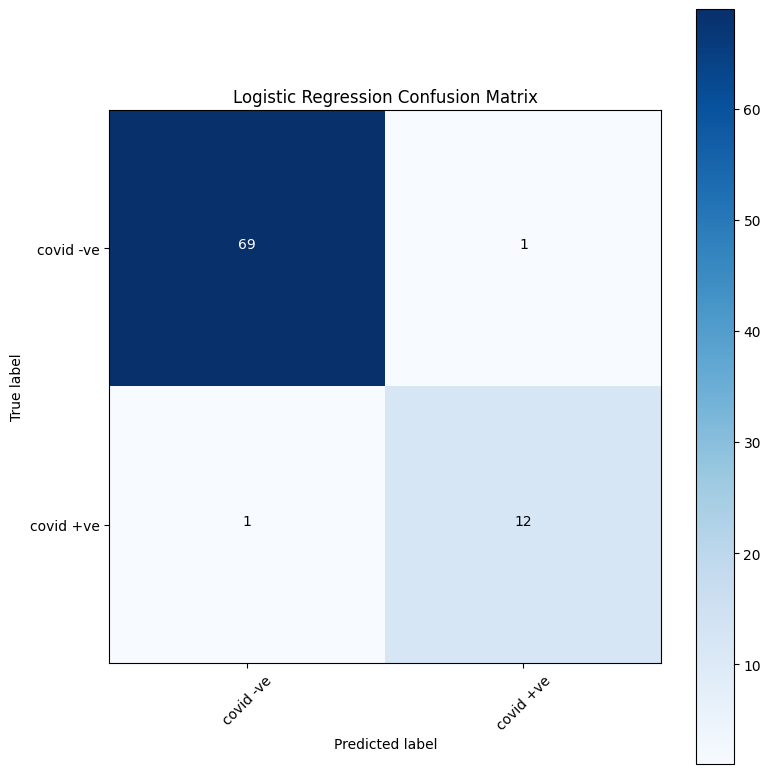

In [96]:
cm_lr = confusion_matrix(y_test, LR_y_pred)
plot_confusion_matrix(cm=cm_lr, classes=cm_plot_labels, title='Logistic Regression Confusion Matrix')

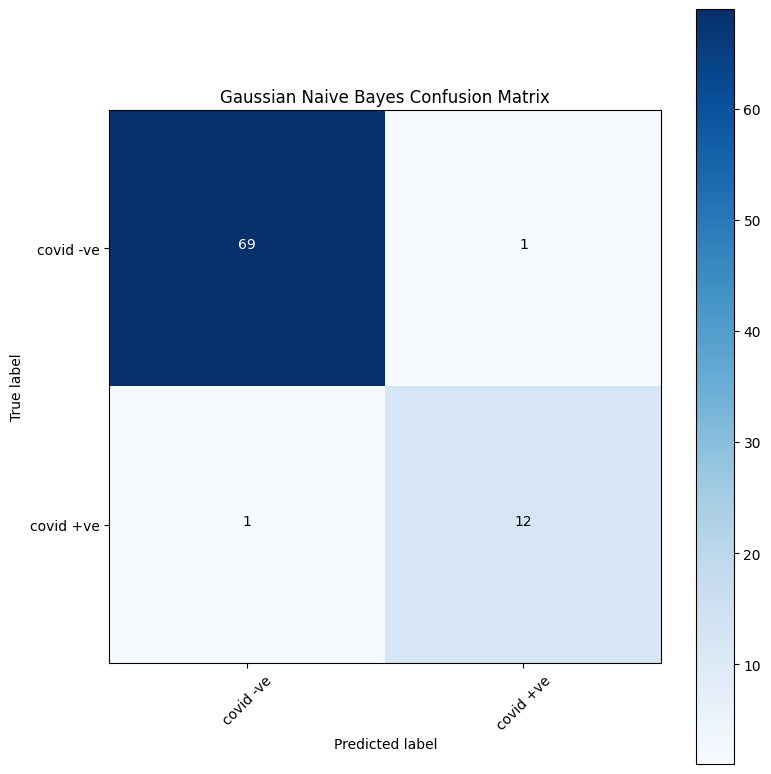

In [97]:
cm_nb = confusion_matrix(y_test, GNB_y_pred)
plot_confusion_matrix(cm=cm_lr, classes=cm_plot_labels, title='Gaussian Naive Bayes Confusion Matrix')

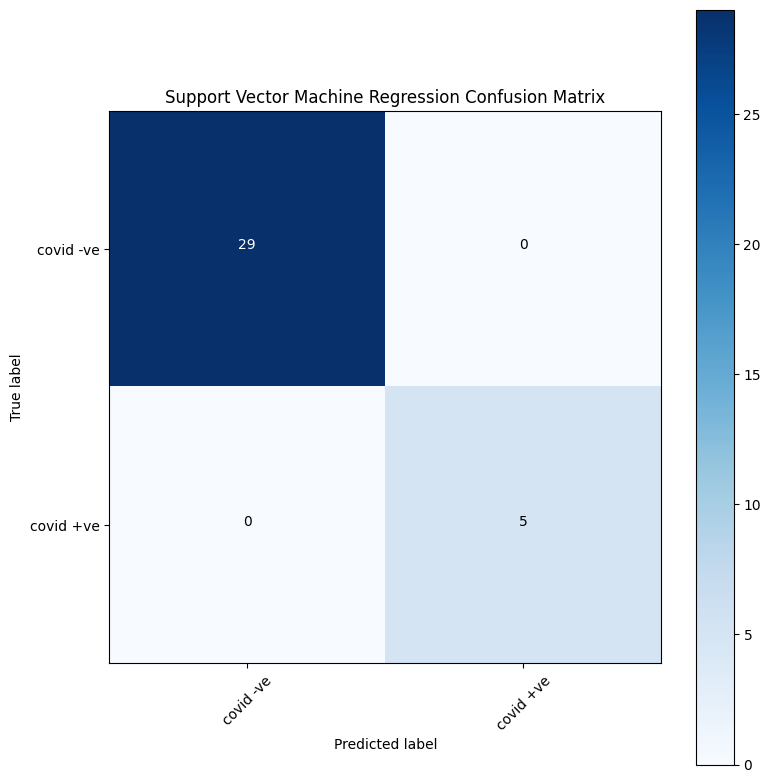

In [72]:
cm_svc = confusion_matrix(y_test, SVC_y_pred)
plot_confusion_matrix(cm=cm_nb, classes=cm_plot_labels, title='Support Vector Machine Regression Confusion Matrix')


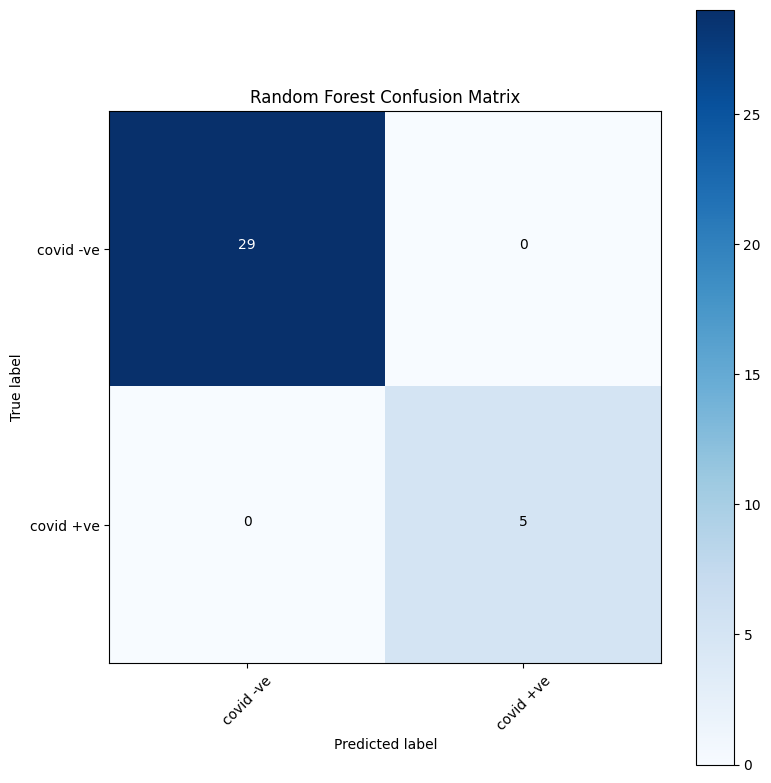

In [73]:
cm_rf = confusion_matrix(y_test, RFC_y_pred)
plot_confusion_matrix(cm=cm_rf, classes=cm_plot_labels, title='Random Forest Confusion Matrix')


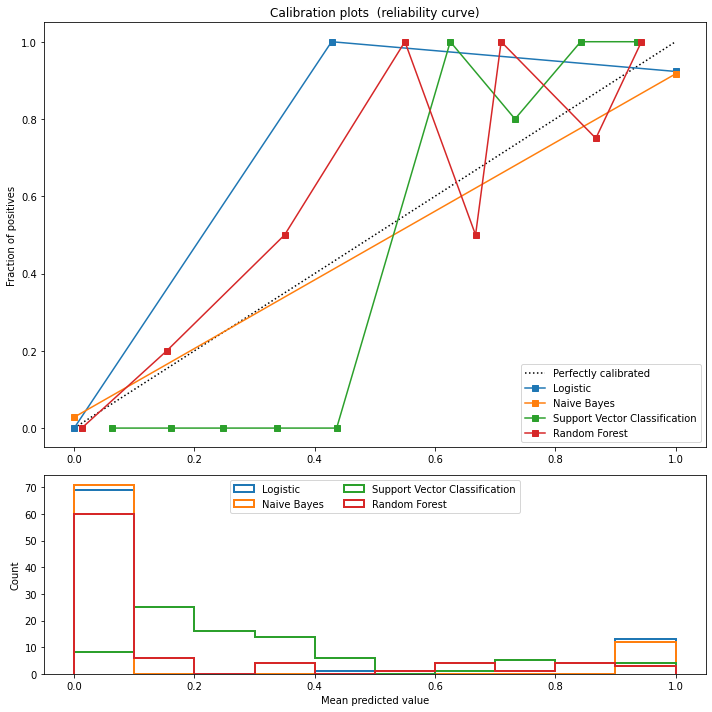

In [98]:
# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()


In [99]:
test_image = cv2.imread('archive/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg')
test_image = cv2.cvtColor(test_image, cv2.IMREAD_GRAYSCALE)
test_image = cv2.resize(test_image, (224, 224))
test_img = test_image.flatten().reshape(1, -1)


LR_pred = LR_Model.predict(test_img)
print(LR_pred)

GNB_pred = GNB_Model.predict(test_img)
print(GNB_pred)

SVC_pred = SVC_Model.predict(test_img)
print(SVC_pred)

RFC_pred = RFC_Model.predict(test_img)
print(RFC_pred)

['normal']
['normal']
['normal']
['normal']


In [100]:
test_image = cv2.imread('archive/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg')
test_image = cv2.cvtColor(test_image, cv2.IMREAD_GRAYSCALE)
test_image = cv2.resize(test_image, (224, 224))
test_img = test_image.flatten().reshape(1, -1)


LR_pred = LR_Model.predict(test_img)
print(LR_pred)

GNB_pred = GNB_Model.predict(test_img)
print(GNB_pred)

SVC_pred = SVC_Model.predict(test_img)
print(SVC_pred)

RFC_pred = RFC_Model.predict(test_img)
print(RFC_pred)

['normal']
['normal']
['normal']
['normal']
